In [2]:
install.packages("tidyverse")
library(ggplot2)


Installing package into 'C:/Users/USER/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\Rtmpc9fMae\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [6]:
##Check current foler
getwd()
filenames <-list.files(path=".",pattern=".csv")
##List working files in Current folder
a=NULL
i=1
for (i in 1:length(filenames)){
  a[[i]] <- read.csv(filenames[i])
  names <- substr(filenames[i],1,2)
  assign(names,read.csv(paste(filenames[i], sep="\t")))
  i=i+1 
  }

[1] "C:/Users/USER/Documents/Data Coding/Github/pdsnd_github"

In [7]:
##Remove Unmatched Gender, Birth Year" Column
chicago = subset(ch,select=-c(Gender,Birth.Year))
nyc=subset(ne,select=-c(Gender,Birth.Year))
##Combine all csv
chicago$city      <- "chicago"
nyc$city      <- "new york"
wa$city      <- "washington"
cities<- rbind(chicago,nyc,wa)

In [7]:
##Q1: What is most Common Start Station?

In [8]:
##Aggregation
library(dplyr)
agg <- cities %>% 
  count(Start.Station)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



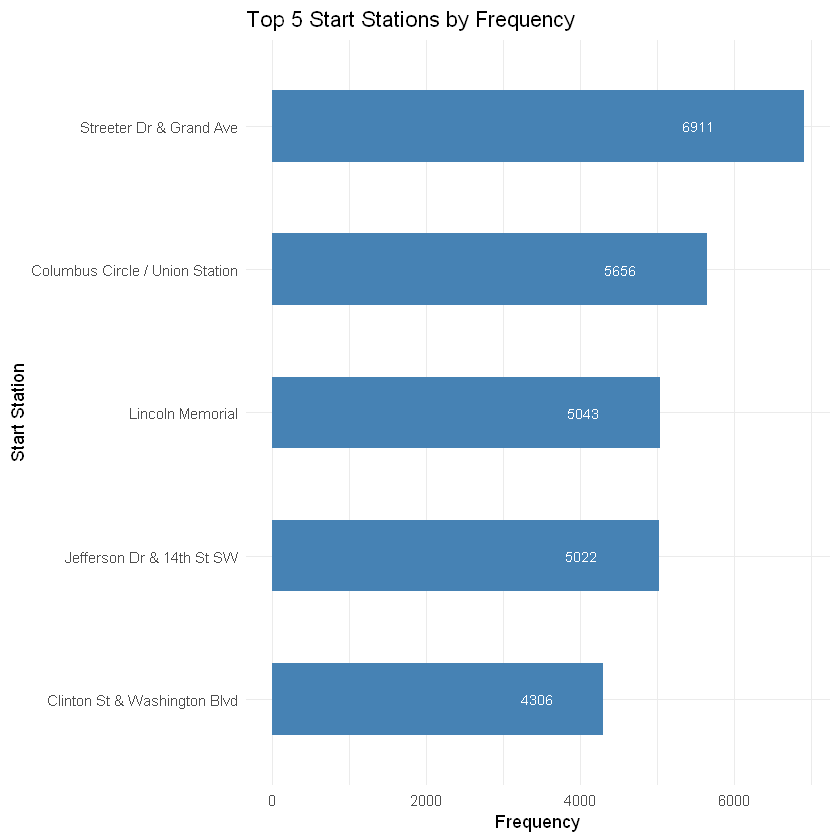

In [9]:
##ggplot
top_n(agg, n=5, n) %>% ggplot(aes(x=reorder(Start.Station,n), y=n,label=n,width=0.5))+
  geom_bar(stat='identity',width=0.7,fill='steelblue')+
  geom_text(size = 3,position = position_stack(vjust = 0.8),color='white')+
  theme(text=element_text(size=10,color='black'))+
  coord_flip()+theme_minimal()+
  xlab("Start Station")+
  scale_y_continuous(seq(0,7000,2000),name="Frequency")+
  ggtitle("Top 5 Start Stations by Frequency")

In [105]:
##Summary Table
tb1<- cities %>%
    group_by(Start.Station) %>%
    summarise(Count=n()) %>% 
    arrange(desc(Count))
head(tb1,5)



Start.Station,Count
Streeter Dr & Grand Ave,6911
Columbus Circle / Union Station,5656
Lincoln Memorial,5043
Jefferson Dr & 14th St SW,5022
Clinton St & Washington Blvd,4306


In [28]:
##Summary
##The most common Start Station is Streeter Dr & Grand Ave.
##Plot Above represents frequency of top 5 start stations in descending order. Top 1 is Station Streeter Dr & Grand Ave with 6911 frequency among 3 cities. 

In [29]:
##Q2 What is the most common hour of the day(start&end hour)?

In [109]:
##Aggregation
install.packages("tidyverse")
library(lubridate)
library(ggplot2)
starthour <- hour(cities$Start.Time)
endhour <- hour(cities$End.Time)
cities2 <- cbind(cities,starthour,endhour)

Installing package into 'C:/Users/USER/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpismGlC\downloaded_packages


Warning message:
"package 'lubridate' was built under R version 3.6.2"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



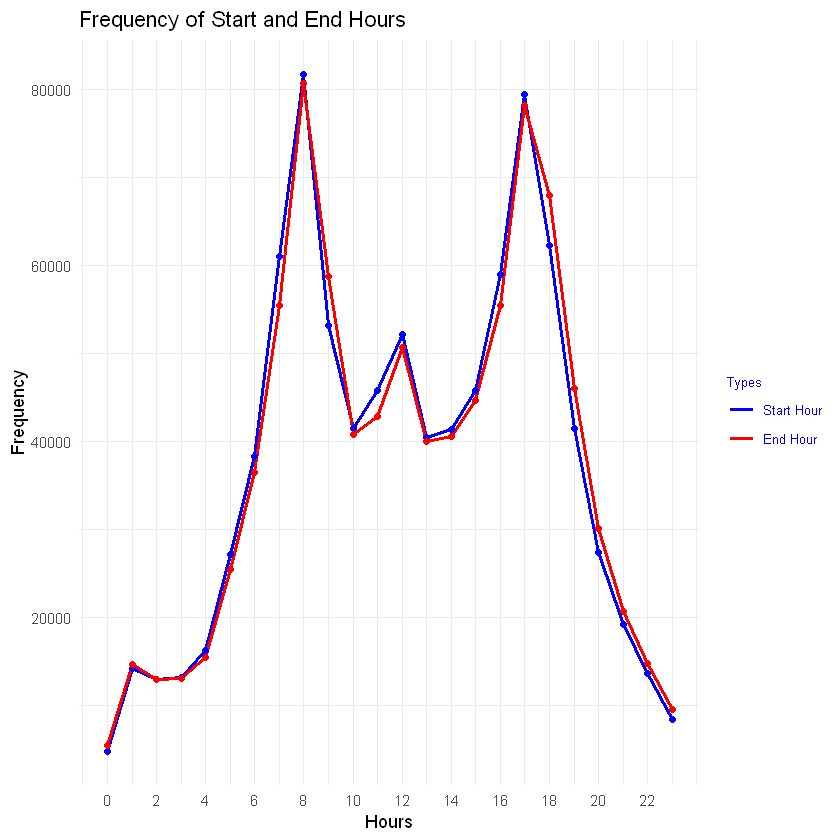

In [32]:
##ggplot
ggplot(data=cities2)+
  geom_line(aes(x=starthour,color='blue'),stat='count',size=1)+
  geom_line(aes(x=endhour,color='red'),stat='count',size=1)+
  geom_point(aes(x=starthour),stat='count',color='blue',size=1.5)+
  geom_point(aes(x=endhour),stat='count',color='red',size=1.5)+
  theme(text=element_text(size=10,color='black'),panel.grid = element_blank())+
  theme_minimal()+
  xlab("Hours")+
  ylab("Frequency")+
  ggtitle("Frequency of Start and End Hours ")+
  scale_color_manual(name="Types",labels = c("Start Hour","End Hour"),values=c("blue","red"))+
  theme(legend.title = element_text(color = "blue", size = 8),legend.text = element_text(color = "blue", size = 8))+
  scale_y_continuous(breaks = seq(0,85000,20000))+
  scale_x_continuous(breaks = seq(0,23,2))


In [115]:
##Summary Table
cities2 %>%
    group_by(starthour) %>%
    summarise(Count=n()) 
cities2 %>%
    group_by(endhour) %>%
    summarise(Count=n()) 


starthour,Count
0,4740
1,14211
2,12910
3,13108
4,16170
5,27165
6,38245
7,61003
8,81734
9,53215


endhour,Count
0,5471
1,14619
2,12886
3,13032
4,15385
5,25422
6,36450
7,55409
8,80644
9,58716


In [35]:
##Summary
##The most common start hour and end hour is 8:00
##It is worth from above plot that peak start and end hour is 8:00 with more than 80000 records. 

In [37]:
##Q3 What is the average travel time for each city?

In [36]:
##Aggreation
func_avg <- function(y){
  avg<-round(mean(y),0)
  return(avg)
}
clm_dur<-c(func_avg(chicago$Trip.Duration),
           func_avg(nyc$Trip.Duration),
           func_avg(wa$Trip.Duration))
clm_city<-c("Chicago","New York City","Washington")
new_table<-data.frame(clm_city,clm_dur)

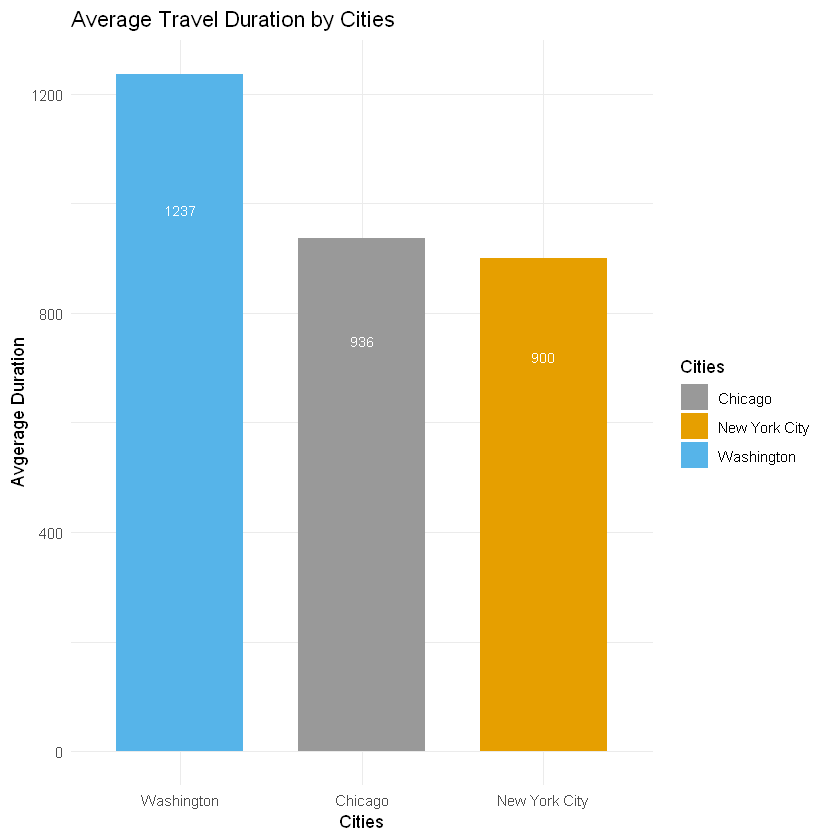

In [37]:
##ggplot
Cities = c("Chicago", "New York City", "Washington")
ggplot(new_table,aes(x=reorder(clm_city,-clm_dur), y=clm_dur,label=clm_dur,fill=Cities))+
  geom_bar(stat='identity',width=0.7)+
  scale_fill_manual(values=c("Chicago"="#999999", "New York City"="#E69F00", "Washington"="#56B4E9"))+
  theme_minimal()+
  xlab("Cities")+
  ylab("Avgerage Duration")+
  ggtitle("Average Travel Duration by Cities")+
  geom_text(size = 3,position = position_stack(vjust = 0.8),color='white')


In [128]:
##Summary Table
cities %>%
   group_by(city) %>%
    summarise(AverageDuration = round(mean(Trip.Duration))) %>%
 arrange(desc(AverageDuration))

city,AverageDuration
washington,1237
chicago,936
new york,900


In [66]:
##Summary
##The average trip duration is 936 for Chicago, 900 for New York City and 1237 for Washington. 
##Plots above summerized average trip duration for each city in descending order, which indicates the hightest average duration